In [1]:
import pandas as pd
import datetime
import matplotlib.pyplot as plt

In [2]:
import warnings
warnings.filterwarnings("ignore")

# Load data

In [3]:
save_address = 'C:/Users/xi-lucy.chen/Documents/GitLab/data_challenge_alc_total/phase 2 model/Lucy/feature/'
wp1 = pd.read_csv(save_address+'wp1.csv')
wp2 = pd.read_csv(save_address+'wp2.csv')
wp3 = pd.read_csv(save_address+'wp3.csv')
wp4 = pd.read_csv(save_address+'wp4.csv')
wp5 = pd.read_csv(save_address+'wp5.csv')
wp6 = pd.read_csv(save_address+'wp6.csv')


In [4]:
for wp in [wp1,wp2,wp3,wp4,wp5,wp6]:
    wp.index = wp['date']
    wp.drop(columns='date',inplace=True)

In [5]:
wp1[0:2]

,wp1,train,u,v,ws,wd,Day sin,Day cos,Year sin,Year cos,...,lag_-1_ws,expanding_mean_u,expanding_mean_v,expanding_mean_ws,lag_2_u,lag_2_v,lag_2_ws,lag_-2_u,lag_-2_v,lag_-2_ws
date,,,,,,,,,,,,,,,,,,,,,
2009-07-01 00:00:00,0.051,1.0,3.14,-3.62,4.79,139.09,0.866025,0.500000,0.015690,-0.999877,...,4.79,1.257736,-0.461744,5.585149,NaN,NaN,NaN,2.96,-3.56,4.63
2009-07-01 01:00:00,0.051,1.0,3.14,-3.62,4.79,139.09,0.965926,0.258819,0.014973,-0.999888,...,4.63,1.258153,-0.461750,5.585237,NaN,NaN,NaN,2.89,-3.46,4.51


In [6]:
def get_X(df):
    return df.iloc[:, 2:]

def get_y(df, name='wp1'):
    return df[name]

def get_X_test(df):
    return df.iloc[:, 1:]

def data_test_split(df, name='wp1'):
    '''
    resplit data & test from full data
    '''
    data = df[df['train'] == 1].sort_values(by='date')
    test = df[df['train'] != 1].sort_values(by='date')
    data = data.drop(columns=['train'])
    test = test.drop(columns=['train', name])
    X = get_X(data)
    y = get_y(data, name)
    X_forecast = get_X_test(test)
    return data, test, X, y, X_forecast


# Data Split

In [7]:
from sklearn.model_selection import train_test_split


def split_data(df, X, y):
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.2, random_state=177)
    return X_train, X_test, y_train, y_test


# XGBOOST

In [8]:
import model1

In [9]:
tune_parameter = False
grid_search = False
params = {'colsample_bytree': 0.6,
          'max_depth': 9,
          'min_child_weight': 5,
          'eval_metric': 'mae',
          'subsample': 0.6,
          'colsample': 1.0,
          'eta': 0.05}

num_boost_round = 1000

# FORECAST

In [10]:
def prediction(X_forecast, test, model, name):
    X_forecast = xgb.DMatrix(data=X_forecast)
    df_predictions = pd.DataFrame({
        'date': test.index,
        name: model.predict(X_forecast),
    })
    save_address = 'C:/Users/xi-lucy.chen/Documents/GitLab/data_challenge_alc_total/phase 2 model/Lucy/result/'
    df_predictions.to_csv(save_address+"pred_{}.csv".format(name))
    return df_predictions


# RUNNNNNN

------ name is : wp1 ------
Baseline MAE is 0.26
[16:55:20] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\learner.cc:480: 
Parameters: { colsample } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[0]	Test-mae:0.32441
Will train until Test-mae hasn't improved in 10 rounds.
[1]	Test-mae:0.31075
[2]	Test-mae:0.29792
[3]	Test-mae:0.28563
[4]	Test-mae:0.27400
[5]	Test-mae:0.26298
[6]	Test-mae:0.25265
[7]	Test-mae:0.24263
[8]	Test-mae:0.23320
[9]	Test-mae:0.22434
[10]	Test-mae:0.21602
[11]	Test-mae:0.20819
[12]	Test-mae:0.20075
[13]	Test-mae:0.19374
[14]	Test-mae:0.18705
[15]	Test-mae:0.18067
[16]	Test-mae:0.17464
[17]	Test-mae:0.16896
[18]	Test-mae:0.16372
[19]	Test-mae:0.15862
[20]	Test-mae:0.15390
[21]	Test-mae:0.14941
[22]	Test-mae:0.14519
[23]	Test-ma

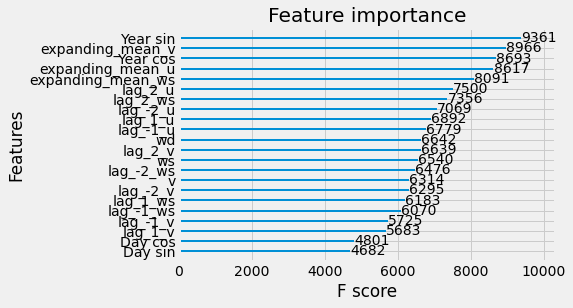

<IPython.core.display.Javascript object>

------ name is : wp2 ------
Baseline MAE is 0.24
[18:34:13] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\learner.cc:480: 
Parameters: { colsample } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[0]	Test-mae:0.32393
Will train until Test-mae hasn't improved in 10 rounds.
[1]	Test-mae:0.31036
[2]	Test-mae:0.29763
[3]	Test-mae:0.28552
[4]	Test-mae:0.27401
[5]	Test-mae:0.26311
[6]	Test-mae:0.25275
[7]	Test-mae:0.24295
[8]	Test-mae:0.23364
[9]	Test-mae:0.22482
[10]	Test-mae:0.21639
[11]	Test-mae:0.20857
[12]	Test-mae:0.20109
[13]	Test-mae:0.19409
[14]	Test-mae:0.18751
[15]	Test-mae:0.18115
[16]	Test-mae:0.17524
[17]	Test-mae:0.16961
[18]	Test-mae:0.16426
[19]	Test-mae:0.15930
[20]	Test-mae:0.15459
[21]	Test-mae:0.15018
[22]	Test-mae:0.14595
[23]	Test-ma

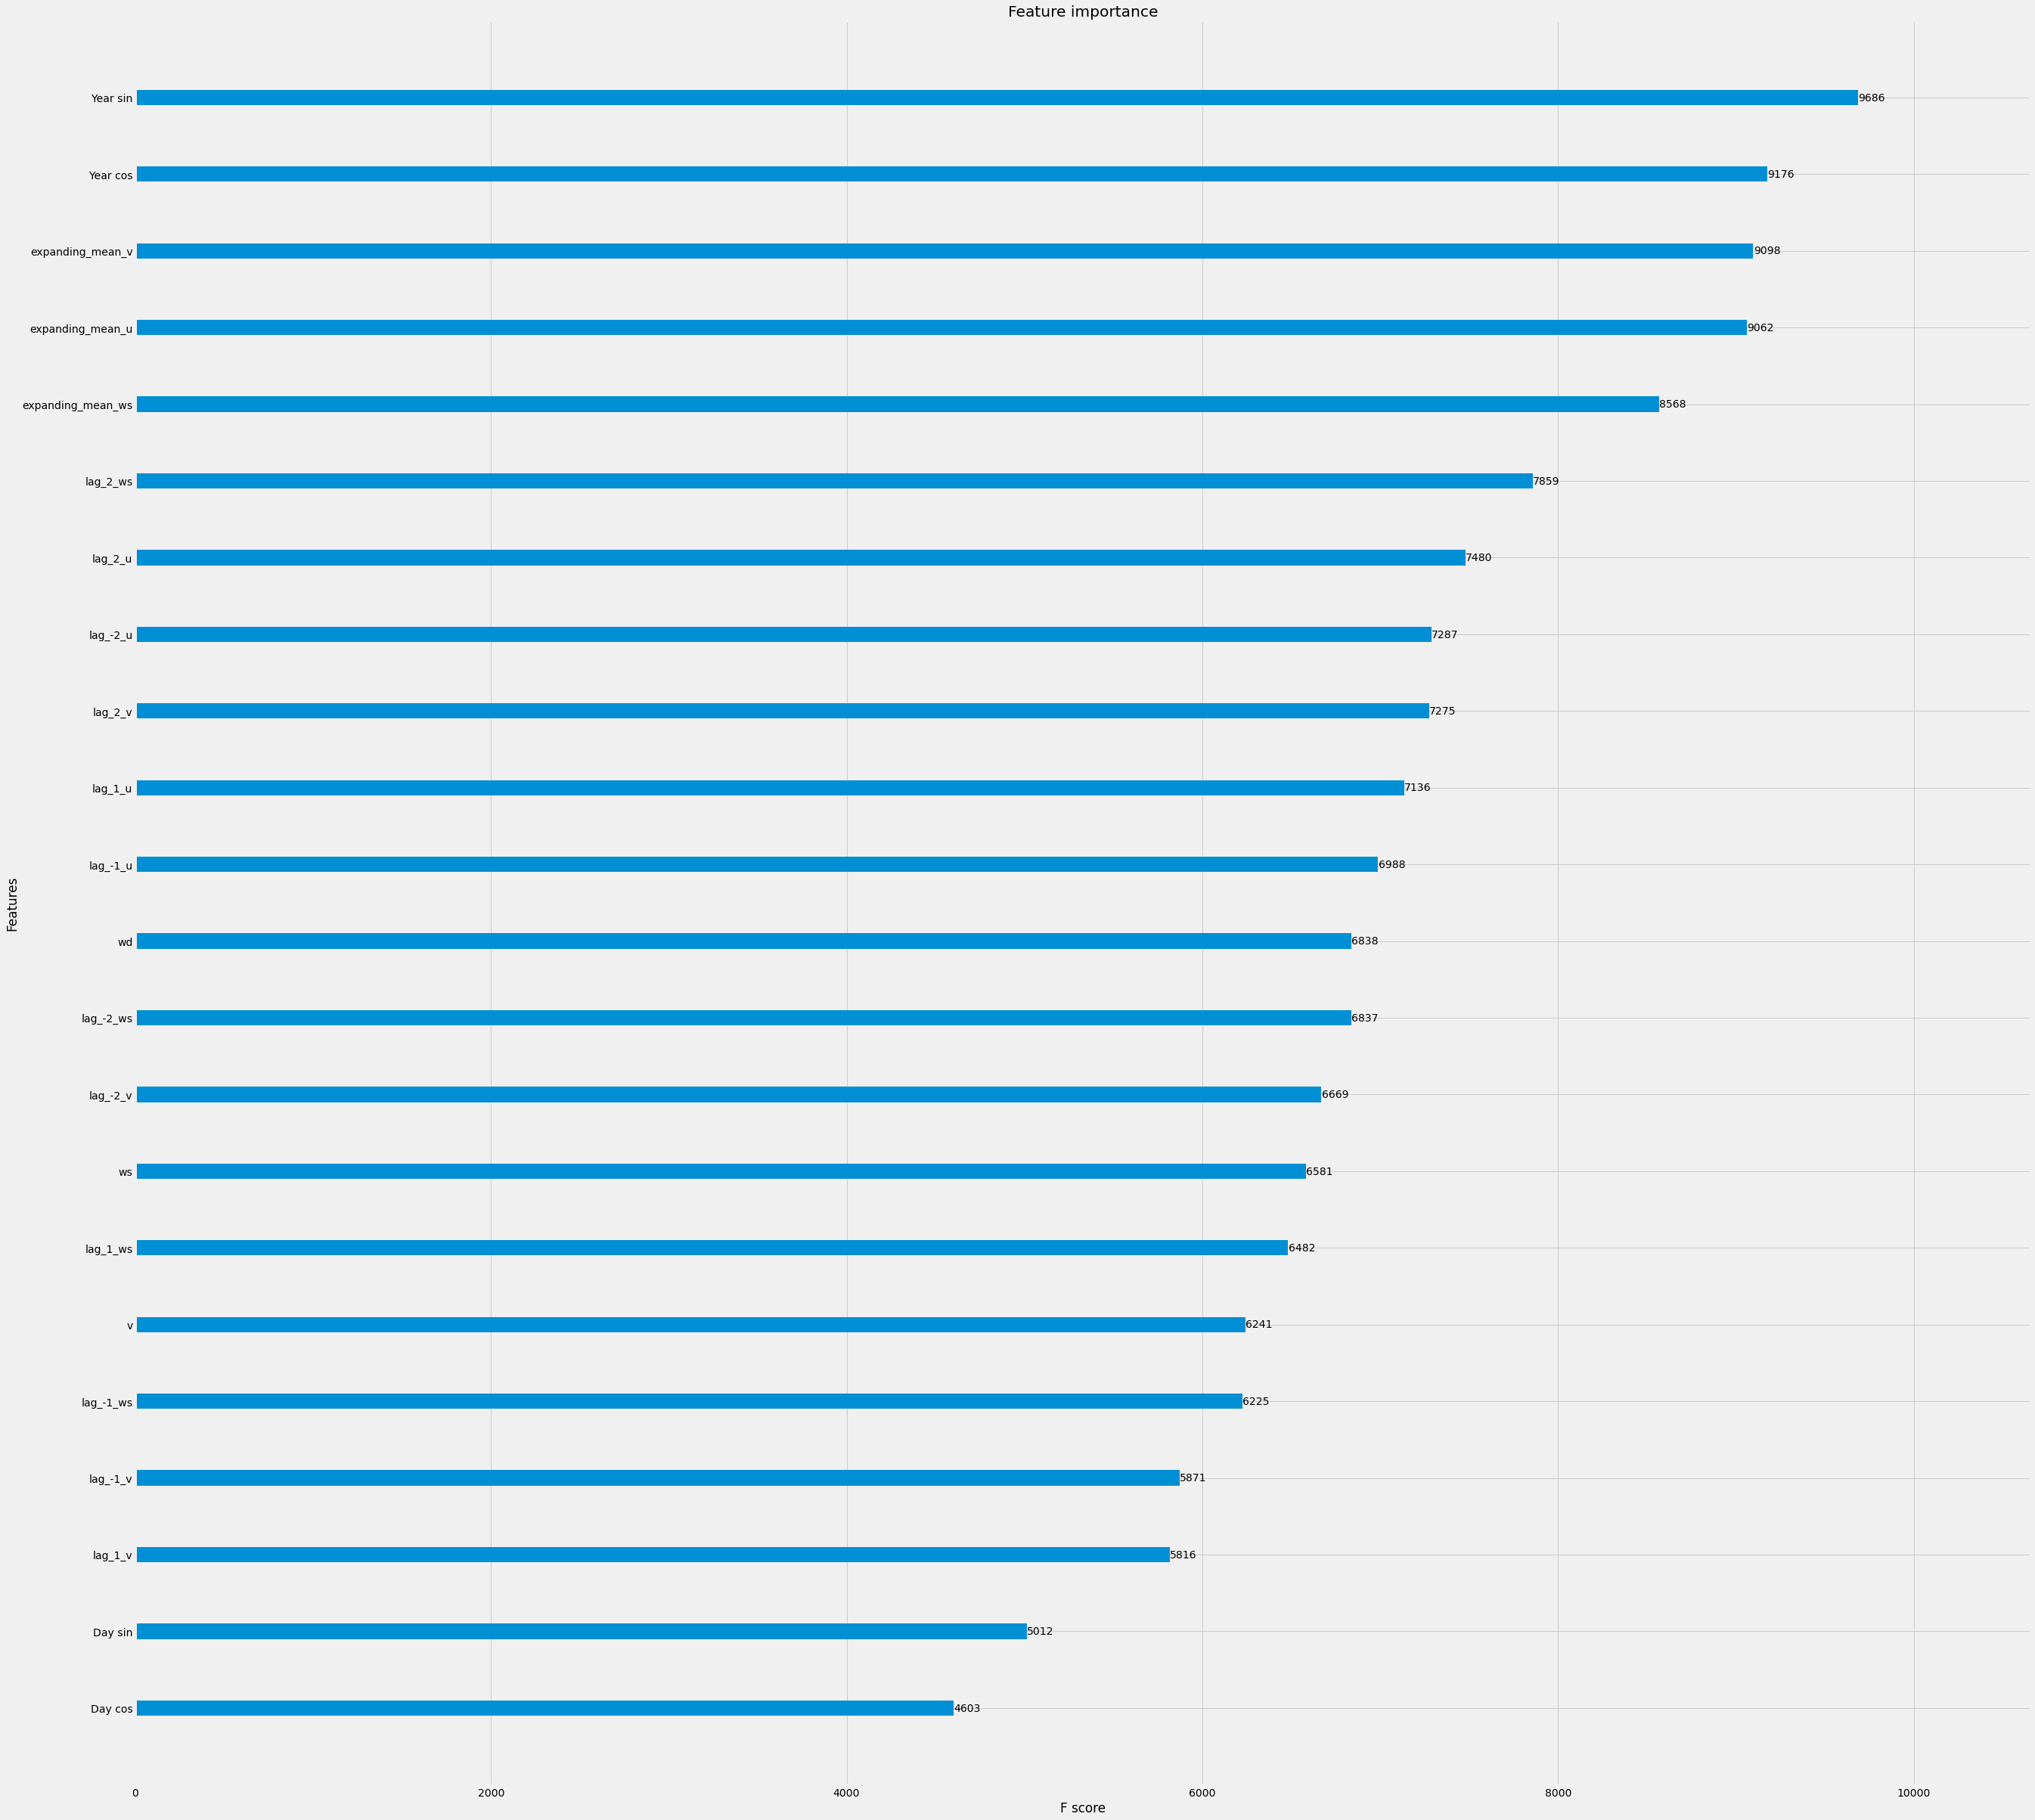

<IPython.core.display.Javascript object>

------ name is : wp3 ------
Baseline MAE is 0.22
[20:14:46] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\learner.cc:480: 
Parameters: { colsample } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[0]	Test-mae:0.31286
Will train until Test-mae hasn't improved in 10 rounds.
[1]	Test-mae:0.30002
[2]	Test-mae:0.28786
[3]	Test-mae:0.27596
[4]	Test-mae:0.26508
[5]	Test-mae:0.25455
[6]	Test-mae:0.24459
[7]	Test-mae:0.23509
[8]	Test-mae:0.22613
[9]	Test-mae:0.21764
[10]	Test-mae:0.20961
[11]	Test-mae:0.20194
[12]	Test-mae:0.19467
[13]	Test-mae:0.18787
[14]	Test-mae:0.18157
[15]	Test-mae:0.17540
[16]	Test-mae:0.16984
[17]	Test-mae:0.16440
[18]	Test-mae:0.15926
[19]	Test-mae:0.15460
[20]	Test-mae:0.14994
[21]	Test-mae:0.14586
[22]	Test-mae:0.14184
[23]	Test-ma

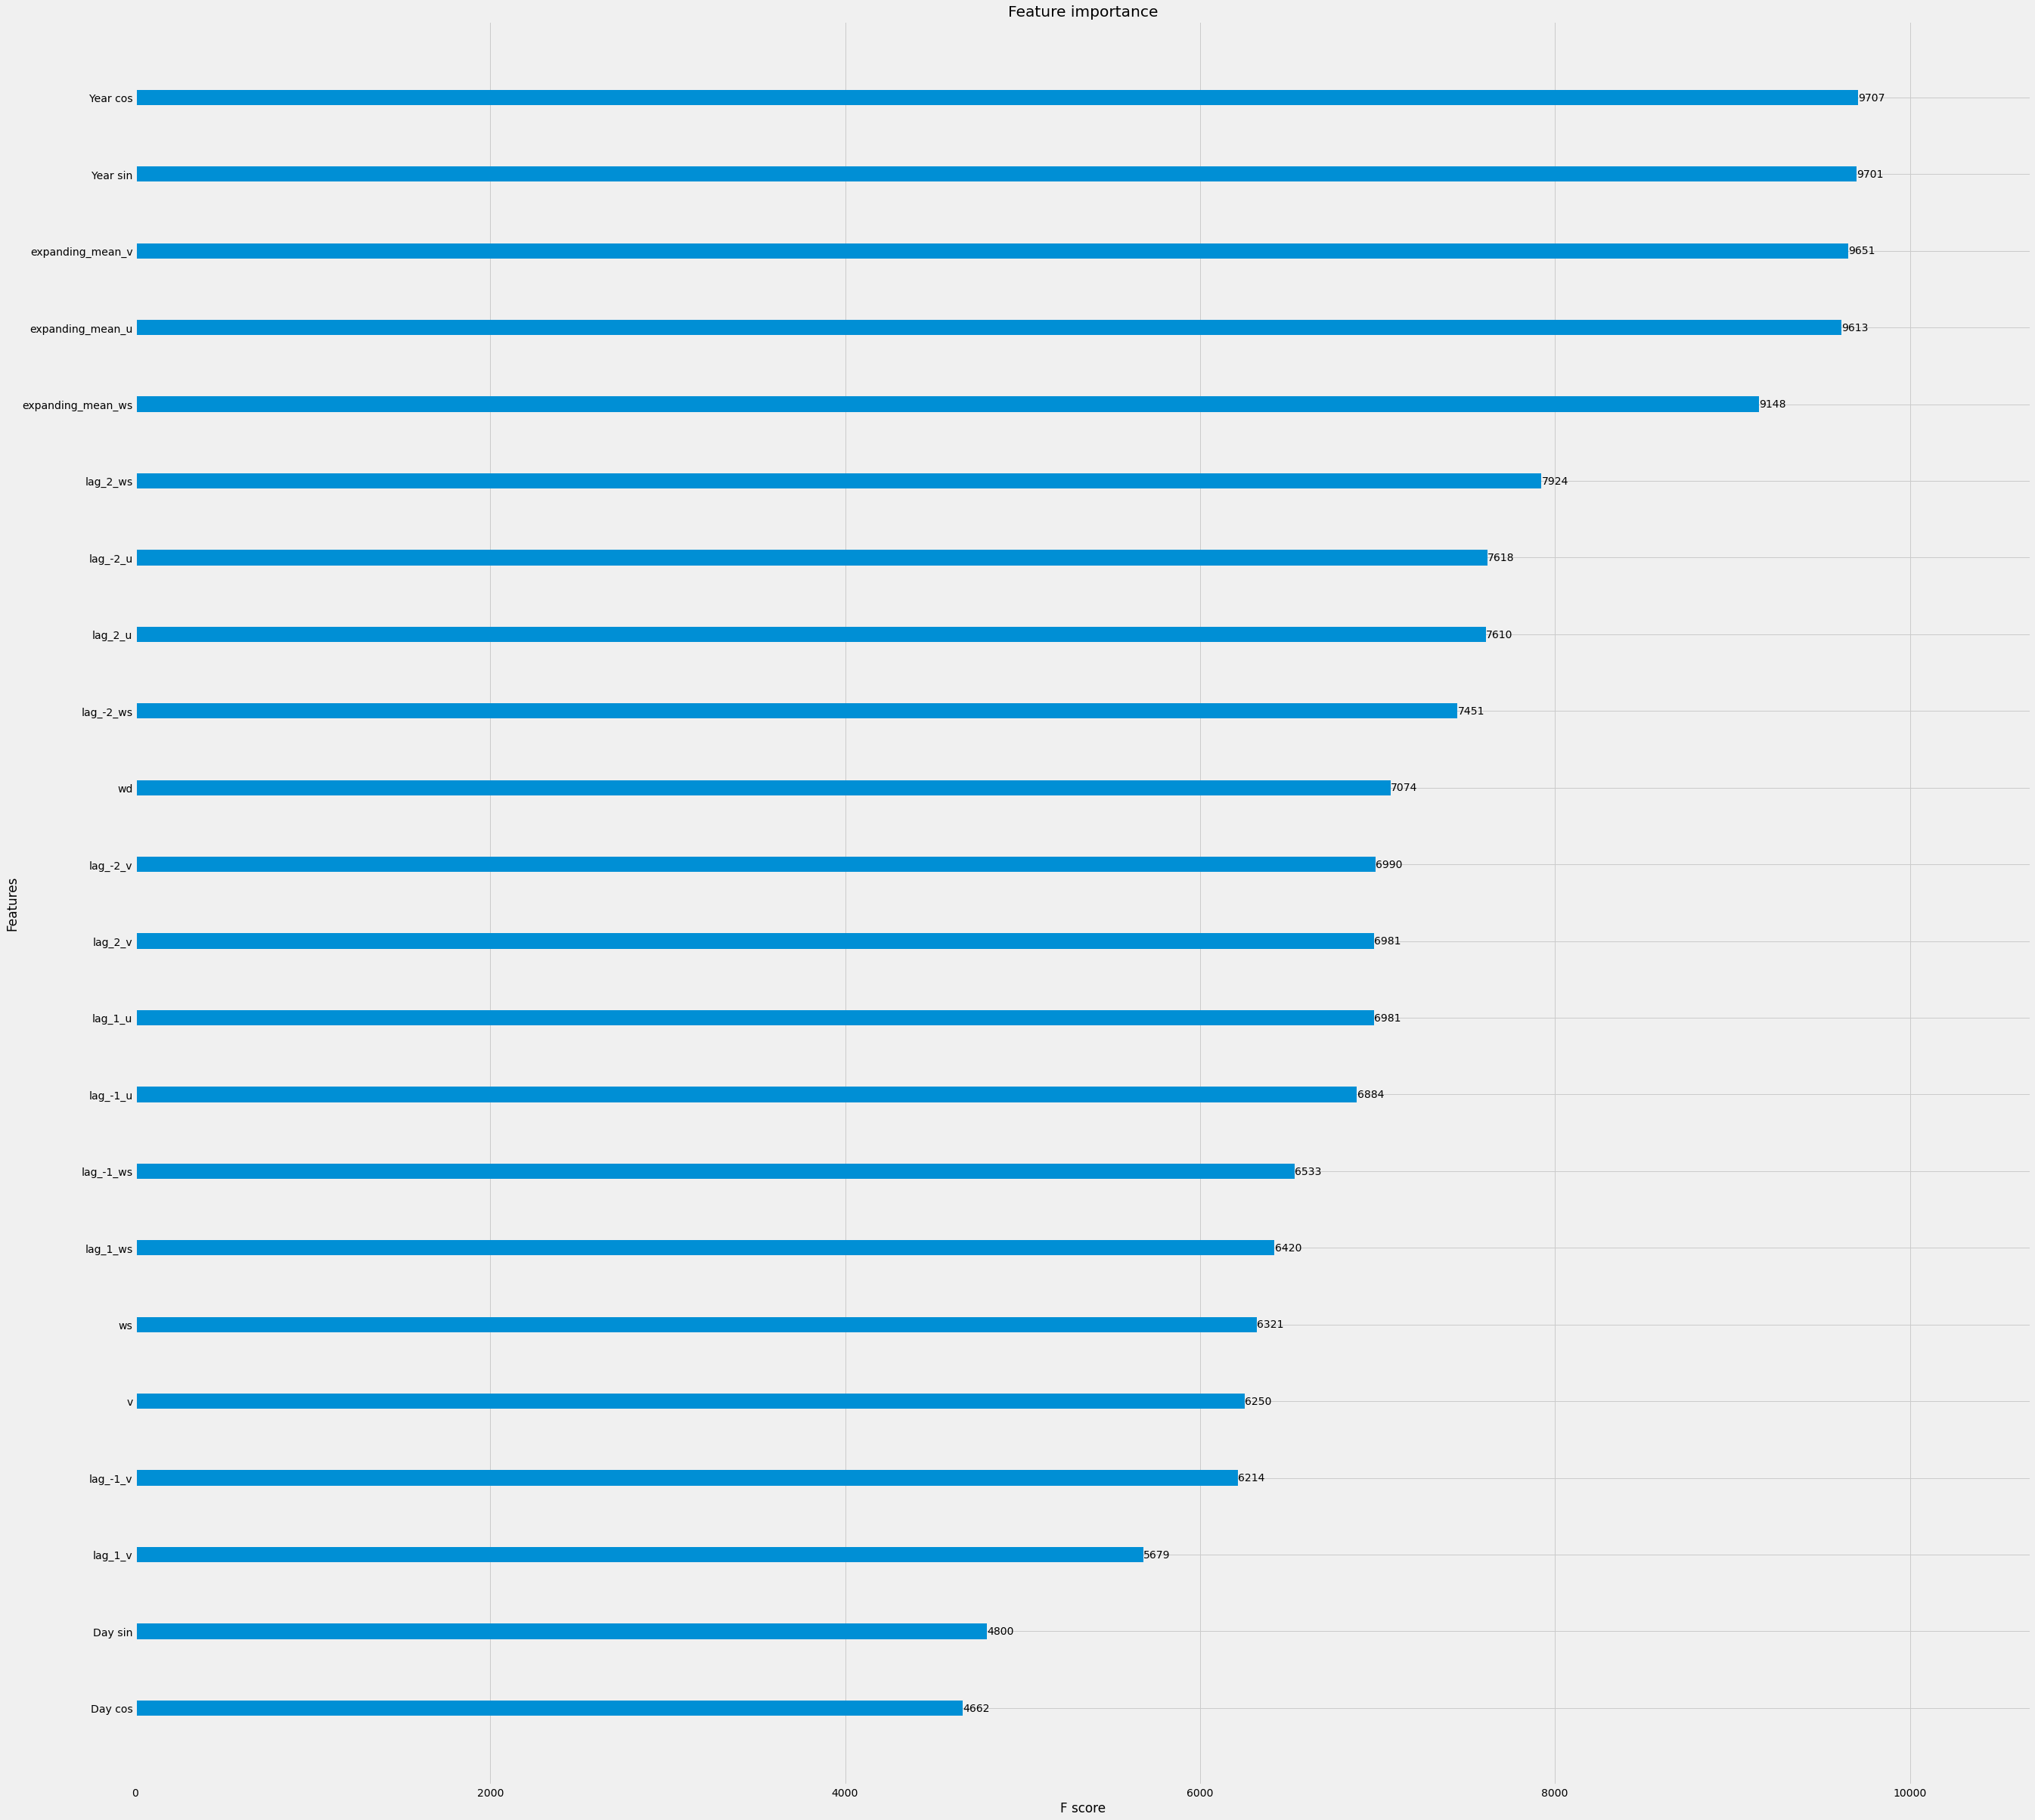

<IPython.core.display.Javascript object>

------ name is : wp4 ------
Baseline MAE is 0.25
[22:02:15] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\learner.cc:480: 
Parameters: { colsample } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[0]	Test-mae:0.31365
Will train until Test-mae hasn't improved in 10 rounds.
[1]	Test-mae:0.30047
[2]	Test-mae:0.28813
[3]	Test-mae:0.27612
[4]	Test-mae:0.26511
[5]	Test-mae:0.25428
[6]	Test-mae:0.24419
[7]	Test-mae:0.23461
[8]	Test-mae:0.22557
[9]	Test-mae:0.21710
[10]	Test-mae:0.20908
[11]	Test-mae:0.20143
[12]	Test-mae:0.19412
[13]	Test-mae:0.18734
[14]	Test-mae:0.18100
[15]	Test-mae:0.17490
[16]	Test-mae:0.16927
[17]	Test-mae:0.16394
[18]	Test-mae:0.15896
[19]	Test-mae:0.15413
[20]	Test-mae:0.14958
[21]	Test-mae:0.14536
[22]	Test-mae:0.14126
[23]	Test-ma

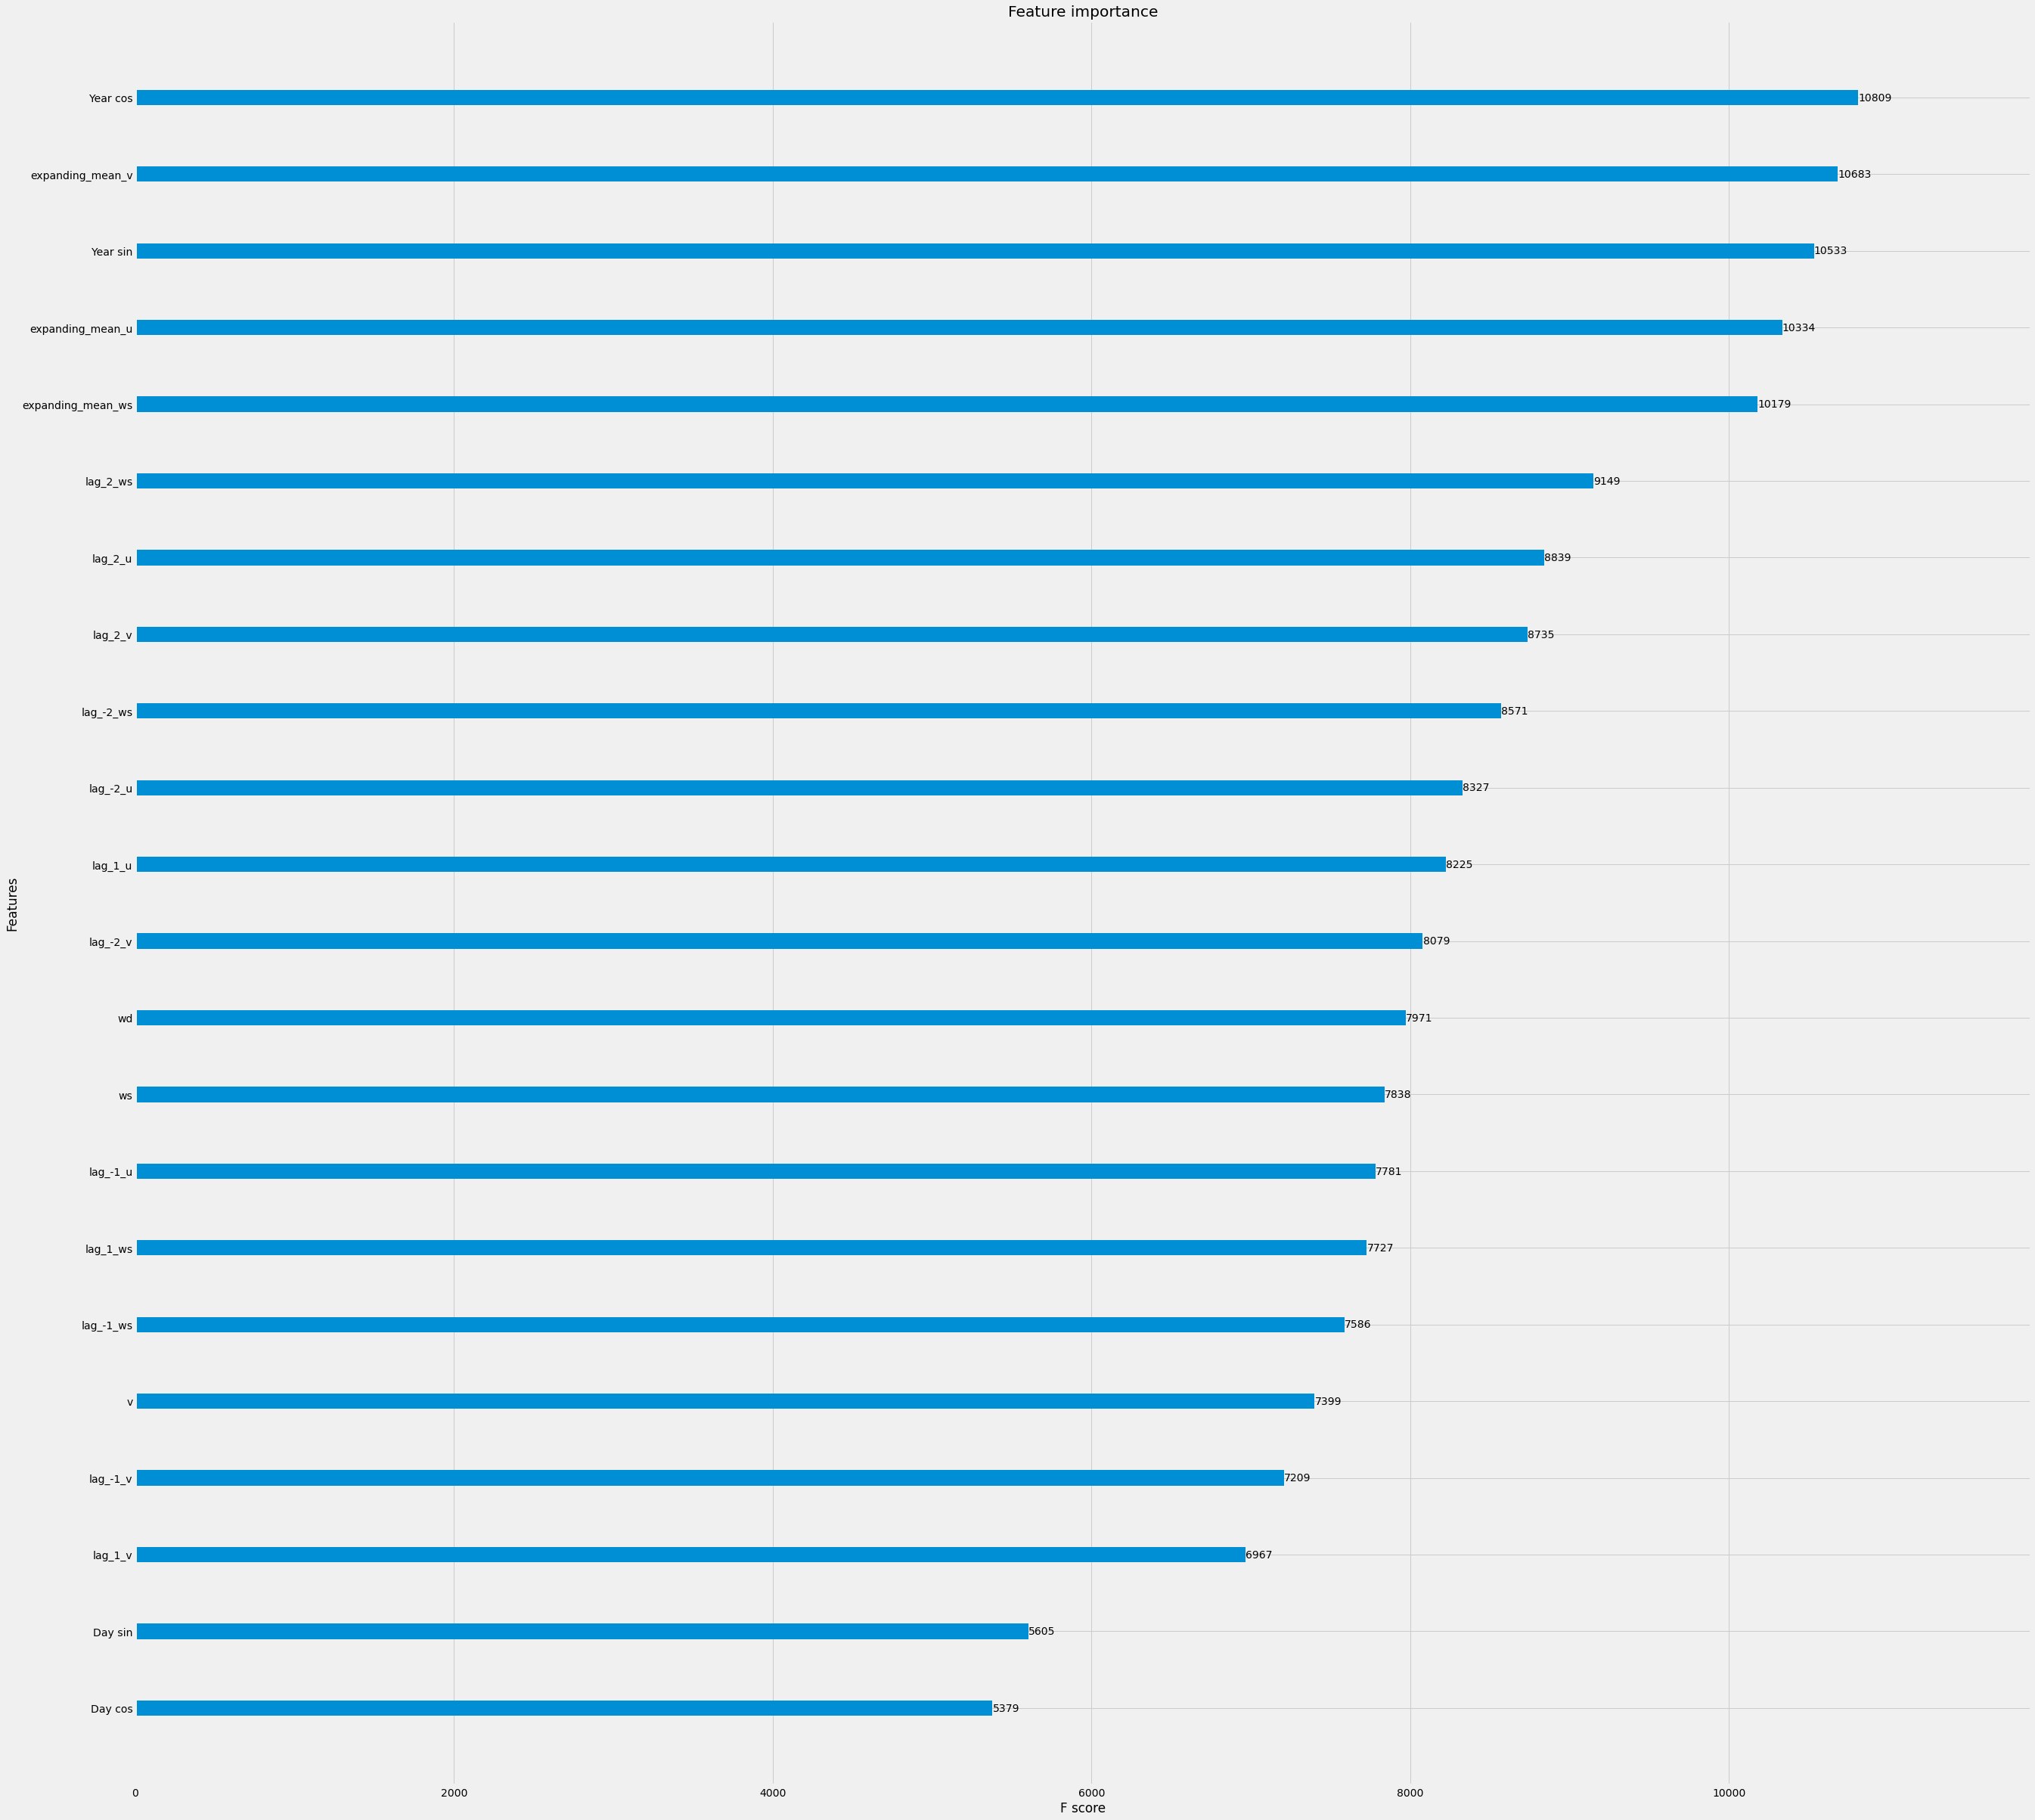

<IPython.core.display.Javascript object>

------ name is : wp5 ------
Baseline MAE is 0.27
[23:54:32] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\learner.cc:480: 
Parameters: { colsample } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[0]	Test-mae:0.31322
Will train until Test-mae hasn't improved in 10 rounds.
[1]	Test-mae:0.30079
[2]	Test-mae:0.28901
[3]	Test-mae:0.27748
[4]	Test-mae:0.26682
[5]	Test-mae:0.25654
[6]	Test-mae:0.24693
[7]	Test-mae:0.23784
[8]	Test-mae:0.22926
[9]	Test-mae:0.22104
[10]	Test-mae:0.21319
[11]	Test-mae:0.20585
[12]	Test-mae:0.19888
[13]	Test-mae:0.19242
[14]	Test-mae:0.18626
[15]	Test-mae:0.18030
[16]	Test-mae:0.17483
[17]	Test-mae:0.16975
[18]	Test-mae:0.16482
[19]	Test-mae:0.16041
[20]	Test-mae:0.15613
[21]	Test-mae:0.15193
[22]	Test-mae:0.14812
[23]	Test-ma

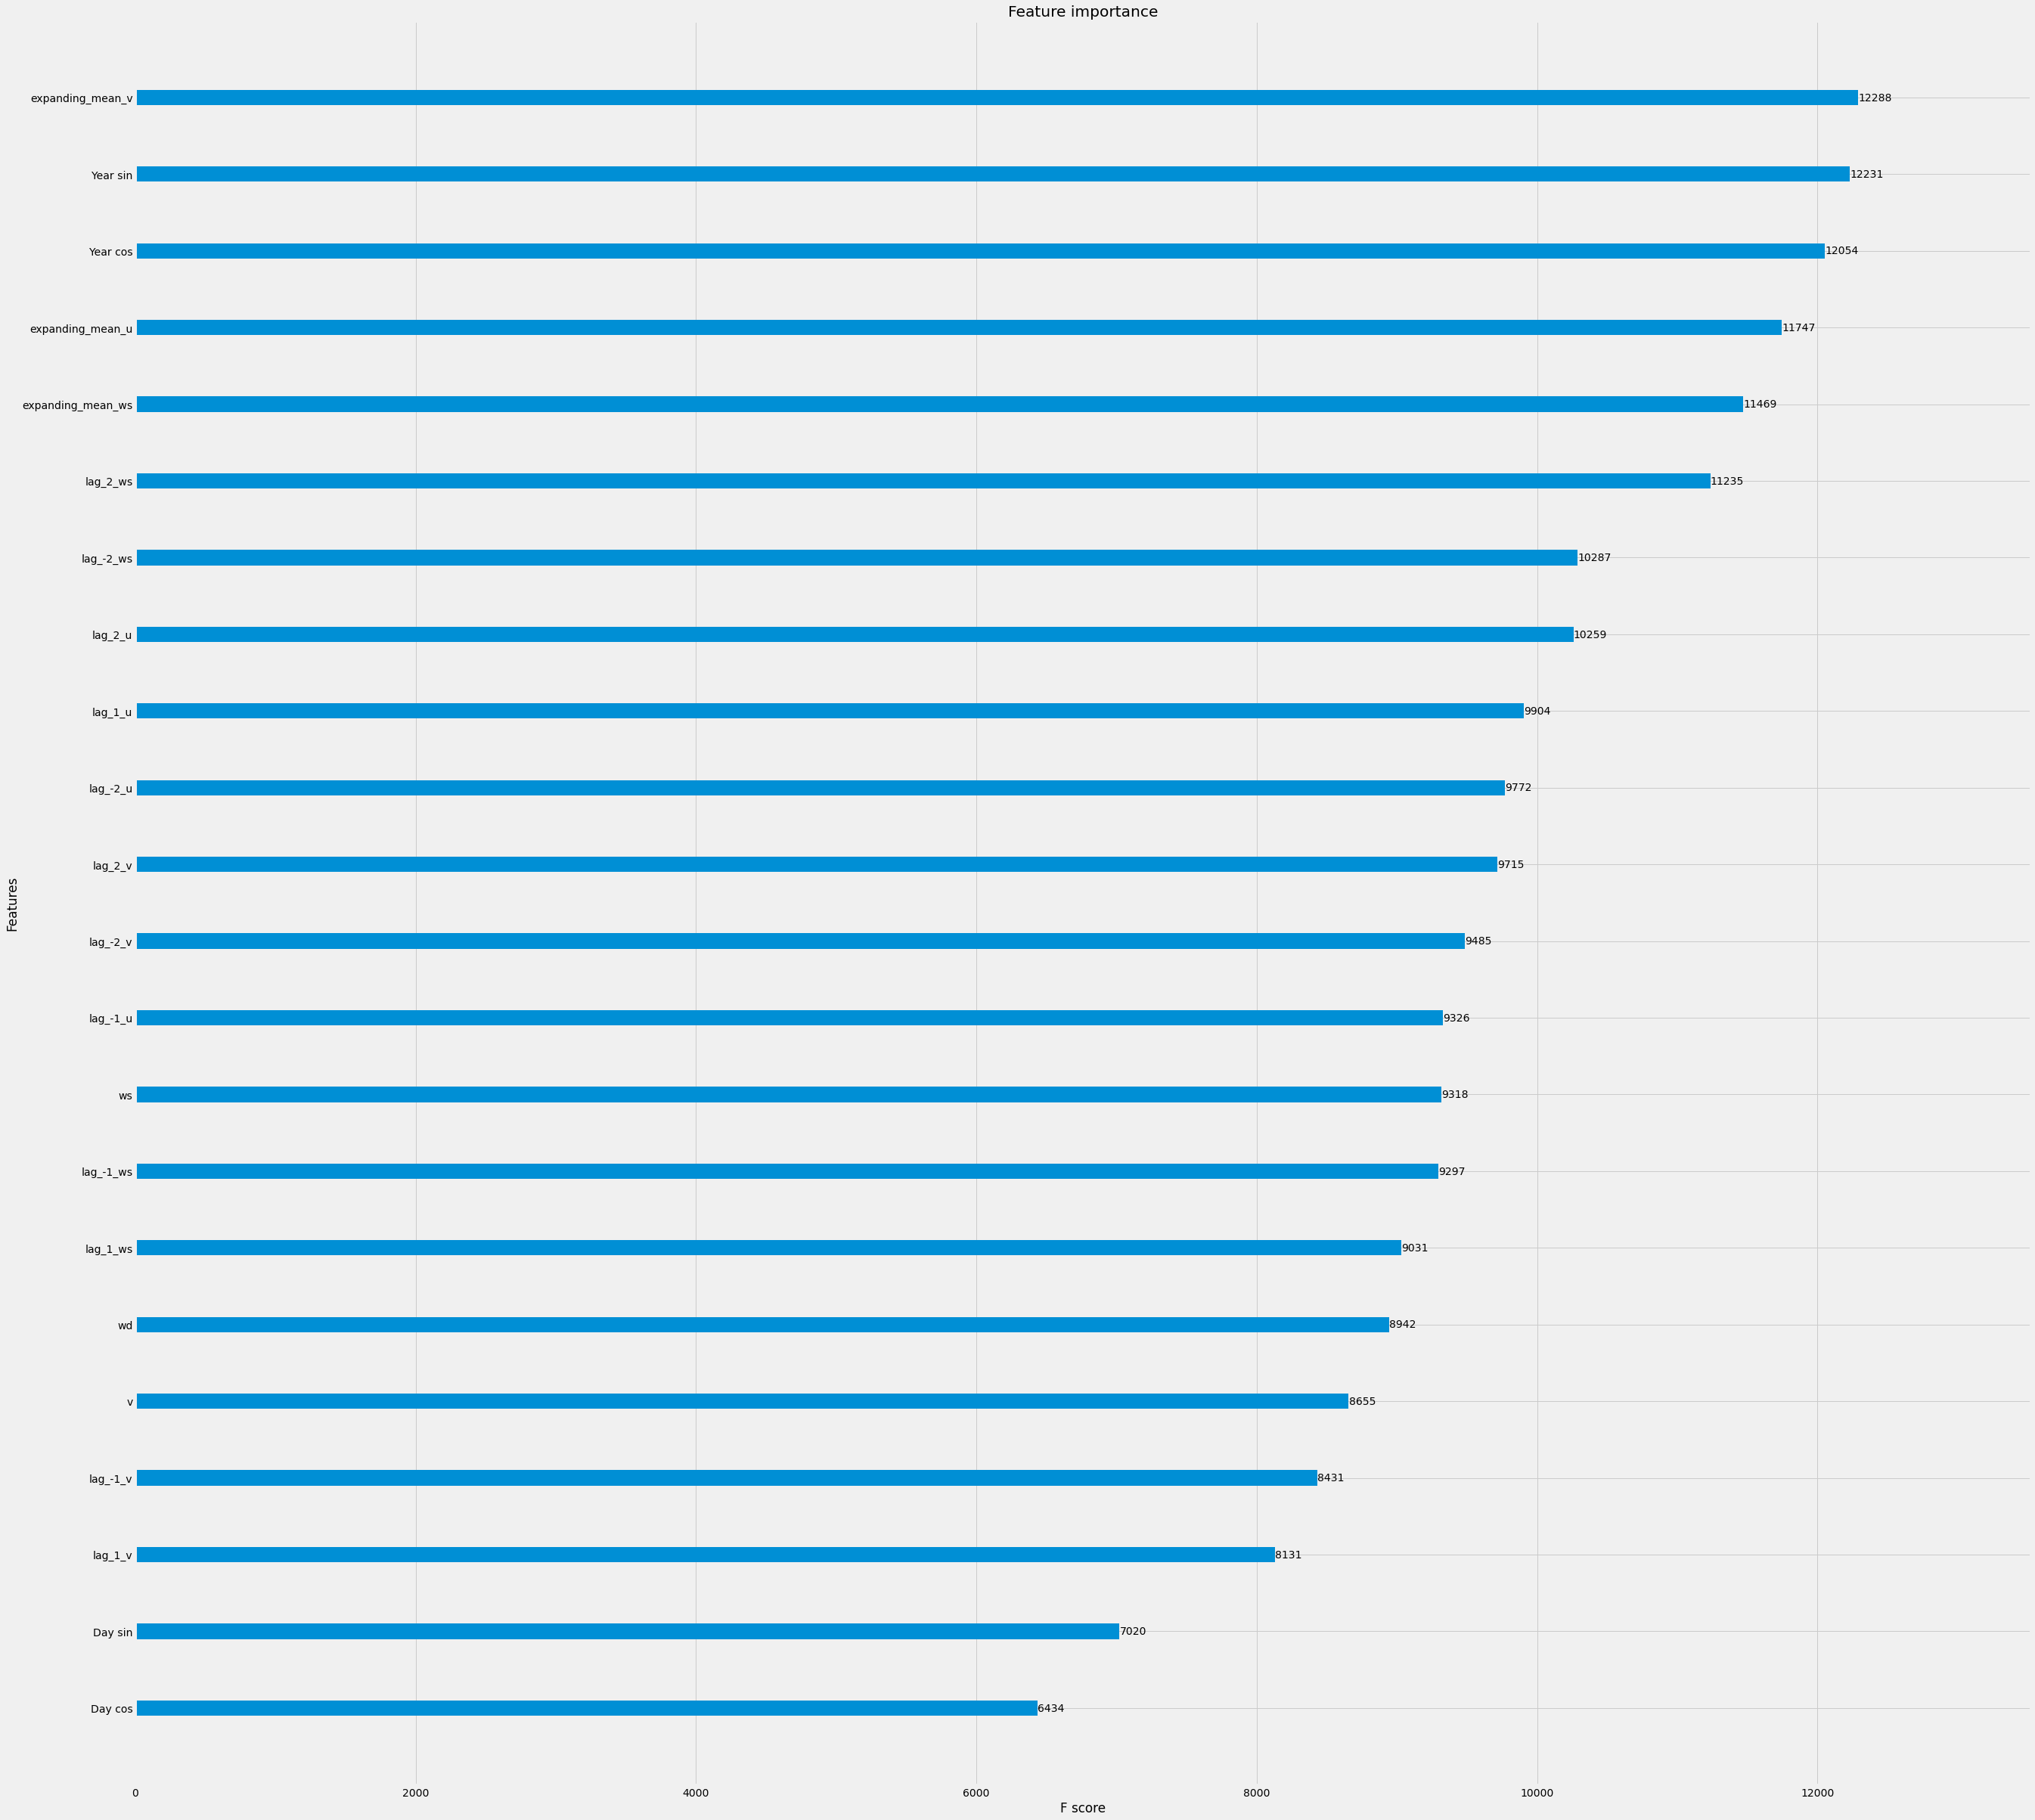

<IPython.core.display.Javascript object>

------ name is : wp6 ------
Baseline MAE is 0.20
[01:52:21] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\learner.cc:480: 
Parameters: { colsample } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[0]	Test-mae:0.30167
Will train until Test-mae hasn't improved in 10 rounds.
[1]	Test-mae:0.28924
[2]	Test-mae:0.27750
[3]	Test-mae:0.26626
[4]	Test-mae:0.25566
[5]	Test-mae:0.24582
[6]	Test-mae:0.23615
[7]	Test-mae:0.22709
[8]	Test-mae:0.21857
[9]	Test-mae:0.21054
[10]	Test-mae:0.20296
[11]	Test-mae:0.19570
[12]	Test-mae:0.18879
[13]	Test-mae:0.18253
[14]	Test-mae:0.17647
[15]	Test-mae:0.17073
[16]	Test-mae:0.16521
[17]	Test-mae:0.16020
[18]	Test-mae:0.15540
[19]	Test-mae:0.15099
[20]	Test-mae:0.14653
[21]	Test-mae:0.14252
[22]	Test-mae:0.13872
[23]	Test-ma

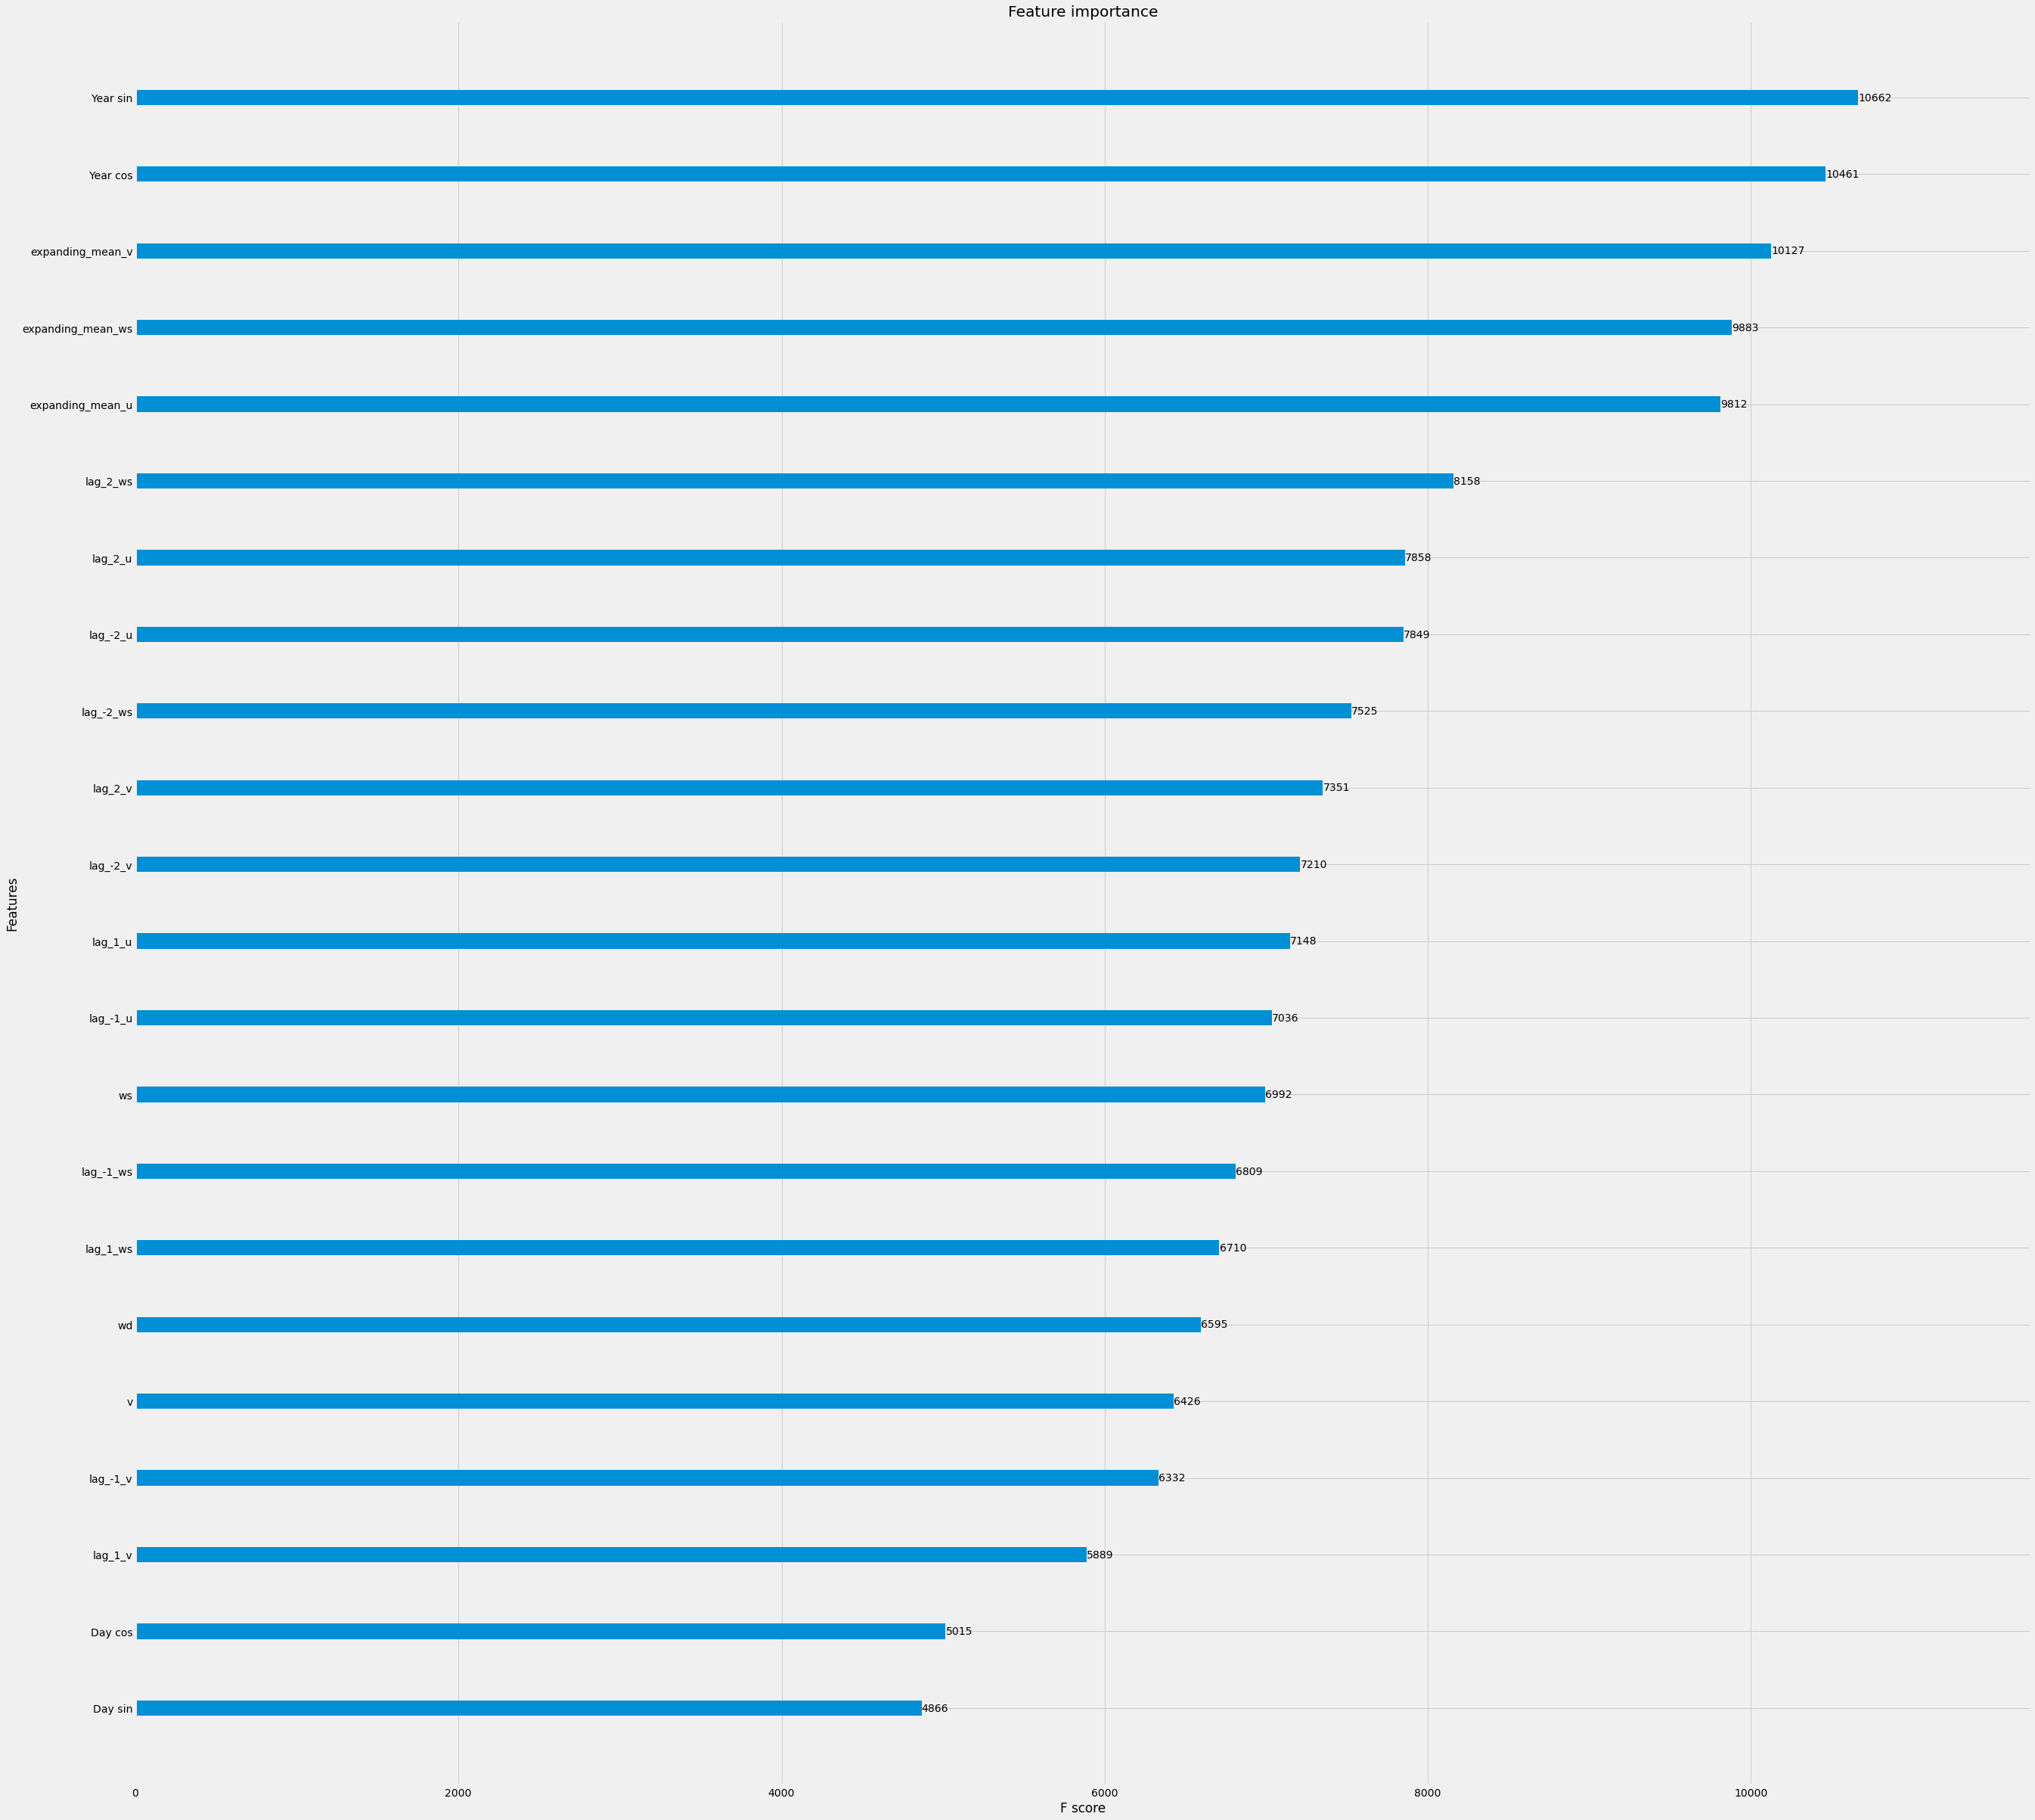

<IPython.core.display.Javascript object>

In [11]:
prediction = pd.DataFrame()
save_address = 'C:/Users/xi-lucy.chen/Documents/GitLab/data_challenge_alc_total/phase 2 model/Lucy/result/'
model_address = 'C:/Users/xi-lucy.chen/Documents/GitLab/data_challenge_alc_total/phase 2 model/Lucy/model/'

for name,df in zip(["wp1", "wp2", "wp3", "wp4", "wp5", "wp6"],[wp1,wp2,wp3,wp4,wp5,wp6]):
    print('------ name is :', name, "------")
    data, test, X, y, X_forecast = data_test_split(df, name=name)
    X_train, X_test, y_train, y_test = split_data(data,X,y)
    model = model1.run_xgb(X_train, X_test, y_train, y_test, params, num_boost_round=num_boost_round,
                        tune_parameter=True, grid_search=False, graph=True)
    X_forecast = xgb.DMatrix(data=X_forecast)
    df_predictions = pd.DataFrame({
        'date': test.index,
        name: model.predict(X_forecast),
    })
    model.save_model(model_address+"model_{}.json".format(name))
    df_predictions.to_csv(save_address+"pred_{}.csv".format(name))
    if name =='wp1':
        prediction = df_predictions
    else:
        prediction = prediction.merge(df_predictions,on=['date'])


In [12]:
prediction
prediction.rename(columns={'date': 'date1'},inplace=True)


In [13]:
data_path = 'C:/Users/xi-lucy.chen/Documents/GitLab/data_challenge_alc_total/data/'
test = pd.read_csv(f'{data_path}test.csv')
prediction = pd.concat([test, prediction], axis=1)
prediction.drop(columns='date1', inplace=True)


In [14]:
save_address = 'C:/Users/xi-lucy.chen/Documents/GitLab/data_challenge_alc_total/phase 2 model/Lucy/result/submission/'
prediction.to_csv(save_address+'predictions.csv', index=False, sep=';')


# Merge predictions

read_address = 'C:/Users/xi-lucy.chen/Documents/GitLab/data_challenge_alc_total/phase 2 model/Lucy/result/'
pred_wp1=pd.read_csv(read_address+"pred_wp1.csv")
pred_wp2=pd.read_csv(read_address+"pred_wp2.csv")
pred_wp3=pd.read_csv(read_address+"pred_wp3.csv")
pred_wp4=pd.read_csv(read_address+"pred_wp4.csv")
pred_wp5=pd.read_csv(read_address+"pred_wp5.csv")
pred_wp6=pd.read_csv(read_address+"pred_wp6.csv")

In [15]:
# read_address = 'C:/Users/xi-lucy.chen/Documents/GitLab/data_challenge_alc_total/phase 2 model/Lucy/result/'
# save_address = 'C:/Users/xi-lucy.chen/Documents/GitLab/data_challenge_alc_total/phase 2 model/Lucy/result/submission/'
# pred1=pd.read_csv(read_address+'pred_wp1.csv')
# pred2=pd.read_csv(read_address+'pred_wp2.csv')
# pred3=pd.read_csv(read_address+'pred_wp3.csv')
# pred4=pd.read_csv(read_address+'pred_wp4.csv')
# pred5=pd.read_csv(read_address+'pred_wp5.csv')
# pred6 = pd.read_csv(read_address+'pred_wp6.csv')

# merge_pred=pd.DataFrame()
# merge_pred=pred1
# merge_pred = merge_pred.merge(pred2,on='date')
# merge_pred = merge_pred.merge(pred3,on='date')
# merge_pred = merge_pred.merge(pred4,on='date')
# merge_pred = merge_pred.merge(pred5,on='date')
# merge_pred = merge_pred.merge(pred6,on='date')


# merge_pred.to_csv('predictions.csv', index=False, sep=';')
# df_predictions.head()
